In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/lorena/.wget-hsts'. HSTS will be disabled.
--2020-07-31 09:33:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.212.176, 216.58.208.48, 172.217.16.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.212.176|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.04s   

2020-07-31 09:33:21 (1.53 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [7]:
tokenizer = Tokenizer()

data = open('/home/lorena/Documents/learning/TensorFlow/EAPoe_Poems.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


 'charmion': 3009, 'rainbow': 3010, 'pettishly': 3011, 'library': 3012, 'evangelists': 3013, 'pshaw': 3014, 'wounded': 3015, 're': 3016, "'s": 3017, 'troublesome': 3018, 'vex': 3019, 'sorry': 3020, 'served': 3021, 'trustworthy': 3022, 'respectful': 3023, 'bethink': 3024, 'fares': 3025, 'needest': 3026, "that's": 3027, 'teeth': 3028, "there's": 3029, 'paste': 3030, 'certain': 3031, 'bursts': 3032, 'courage': 3033, 'viper': 3034, 'cherished': 3035, 'sting': 3036, 'taking': 3037, "least's": 3038, 'pretty': 3039, 'remembers': 3040, 'inurned': 3041, 'whispers': 3042, 'yawning': 3043, 'ruined': 3044, 'gain': 3045, 'lied': 3046, 'enters': 3047, 'unobserved': 3048, 'refuge': 3049, 'war': 3050, 'frightful': 3051, 'disturb': 3052, 'worry': 3053, 'grieves': 3054, 'priestly': 3055, 'raiment': 3056, 'fills': 3057, 'awe': 3058, 'precious': 3059, 'rivulet': 3060, 'sisters': 3061, 'confidence': 3062, 'unspeakable': 3063, 'misery': 3064, 'begone': 3065, 'saidst': 3066, 'imperative': 3067, 'anything': 3

In [8]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		#generate n-grams
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [12]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['raven'])

4
1
1046
3
248


In [13]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0  223   35    5  430 1989
   78]


In [14]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [15]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0  223   35    5  430
 1989]
[0. 0. 0. ... 0. 0. 0.]


In [16]:
print(tokenizer.word_index)

3008, 'charmion': 3009, 'rainbow': 3010, 'pettishly': 3011, 'library': 3012, 'evangelists': 3013, 'pshaw': 3014, 'wounded': 3015, 're': 3016, "'s": 3017, 'troublesome': 3018, 'vex': 3019, 'sorry': 3020, 'served': 3021, 'trustworthy': 3022, 'respectful': 3023, 'bethink': 3024, 'fares': 3025, 'needest': 3026, "that's": 3027, 'teeth': 3028, "there's": 3029, 'paste': 3030, 'certain': 3031, 'bursts': 3032, 'courage': 3033, 'viper': 3034, 'cherished': 3035, 'sting': 3036, 'taking': 3037, "least's": 3038, 'pretty': 3039, 'remembers': 3040, 'inurned': 3041, 'whispers': 3042, 'yawning': 3043, 'ruined': 3044, 'gain': 3045, 'lied': 3046, 'enters': 3047, 'unobserved': 3048, 'refuge': 3049, 'war': 3050, 'frightful': 3051, 'disturb': 3052, 'worry': 3053, 'grieves': 3054, 'priestly': 3055, 'raiment': 3056, 'fills': 3057, 'awe': 3058, 'precious': 3059, 'rivulet': 3060, 'sisters': 3061, 'confidence': 3062, 'unspeakable': 3063, 'misery': 3064, 'begone': 3065, 'saidst': 3066, 'imperative': 3067, 'anythin

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)


Train on 20473 samples
Epoch 1/10
20473/20473 [==============================] - 52s 3ms/sample - loss: 6.8169 - accuracy: 0.0798
Epoch 2/10
20473/20473 [==============================] - 48s 2ms/sample - loss: 5.9669 - accuracy: 0.1095
Epoch 3/10
20473/20473 [==============================] - 61s 3ms/sample - loss: 5.1851 - accuracy: 0.1493
Epoch 4/10
20473/20473 [==============================] - 63s 3ms/sample - loss: 4.3734 - accuracy: 0.2011
Epoch 5/10
20473/20473 [==============================] - 66s 3ms/sample - loss: 3.6412 - accuracy: 0.2794
Epoch 6/10
20473/20473 [==============================] - 72s 3ms/sample - loss: 3.0611 - accuracy: 0.3581
Epoch 7/10
20473/20473 [==============================] - 72s 4ms/sample - loss: 2.6174 - accuracy: 0.4286
Epoch 8/10
20473/20473 [==============================] - 71s 3ms/sample - loss: 2.3128 - accuracy: 0.4809
Epoch 9/10
20473/20473 [==============================] - 72s 4ms/sample - loss: 2.0797 - accuracy: 0.5237
Epoch 10/10
20

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

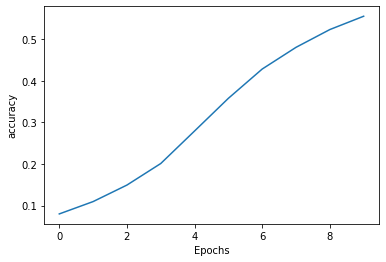

In [19]:
plot_graphs(history, 'accuracy')


In [22]:
seed_text = " "
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

the earl of leicester and in his gulistan shall be not the least obeisance made he not to dishonor my love is folly and looking and i opened methinks without you did not be forgotten it thou'lt well thee be it be blest the following throne heard past the stars in the holy river as a spell upon the table after a spirit which is it is the corporate silence dread man be the least obeisance has the snow 1843 him streaming throws the day that light she rode from the skies along those kisses along the melancholy burden bore
